<a href="https://colab.research.google.com/github/varunk04/computer_vision/blob/main/04_Tensorflow_CV_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Image Classification:

Multiclass is an extended version of binary classification.

Steps in multiclass classification:

1. Become one with the data
2. Preprocess the data
3. Create the model
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparametres and improve the model.
7. Repeat untill satisfied.

## 1. Import and become one with the data:


In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

#unzip our data:

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip','r')
zip_ref.extractall()
zip_ref.close()


--2023-05-19 13:06:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  54.5MB/s    in 6.8s    

2023-05-19 13:06:22 (72.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# walk through 10 classes of food image data

for dirpath, dirnames,filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")
                                           

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 10 directori

In [3]:
# Se up the train and test directories:

train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [4]:
# Lets get the class names:

import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
# Lets visualize the data:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):

  #setup the target directory:
  target_folder = target_dir + "/" + target_class

  # Get the random imaeg path:
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib:
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)

  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape : {img.shape}")

  return img

['1997049.jpg']
Image shape : (512, 384, 3)


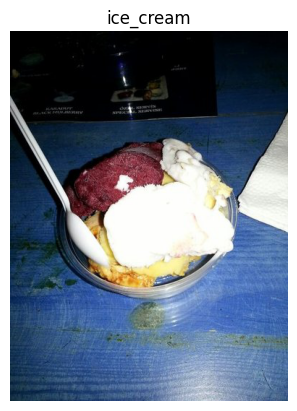

In [6]:
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

## 2. Preprocess the data:

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale:

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

#Load data in from directories and turn it into batches:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with the baseline model):

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense, Activation

In [9]:
# Create the model:

model_1 = Sequential([
    Conv2D(10, 3, input_shape = (224,224,3)),
    Activation(activation  ='relu'),
    Conv2D(10,3, activation = 'relu'),
    MaxPool2D(2),
    Conv2D(10,3,activation = 'relu'),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10),
    Activation(activation = 'softmax') #Multiclass classification
]
)

# Compile the model:

model_1.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [10]:
# Fit the model:
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 64s 222ms/step - loss: 2.1867 - accuracy: 0.1977 - val_loss: 2.0125 - val_accuracy: 0.2816
Epoch 2/5
235/235 [==============================] - 53s 224ms/step - loss: 1.9243 - accuracy: 0.3272 - val_loss: 1.8920 - val_accuracy: 0.3156
Epoch 3/5
235/235 [==============================] - 51s 218ms/step - loss: 1.6564 - accuracy: 0.4409 - val_loss: 1.8549 - val_accuracy: 0.3616
Epoch 4/5
235/235 [==============================] - 51s 216ms/step - loss: 1.1435 - accuracy: 0.6301 - val_loss: 2.0516 - val_accuracy: 0.3424
Epoch 5/5
235/235 [==============================] - 51s 216ms/step - loss: 0.4914 - accuracy: 0.8473 - val_loss: 2.9393 - val_accuracy: 0.2904


In [11]:
# Plot the validation and training data separately:

def plot_loss_curve(history):
  """
  Returns seperate loss curves for training and validation sets
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))
  
  # Plot the loss:
  plt.figure(figsize = (12,8))
  plt.plot(epochs, loss, label = 'Training_loss')
  plt.plot(epochs, val_loss, label = 'Val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  #Plot the accurcay:
  plt.figure(figsize = (12,8))
  plt.plot(epochs, accuracy, label = 'Training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'Val_laccuracy')
  plt.title('accuracy')
  plt.xlabel('Epochs')
  plt.legend()

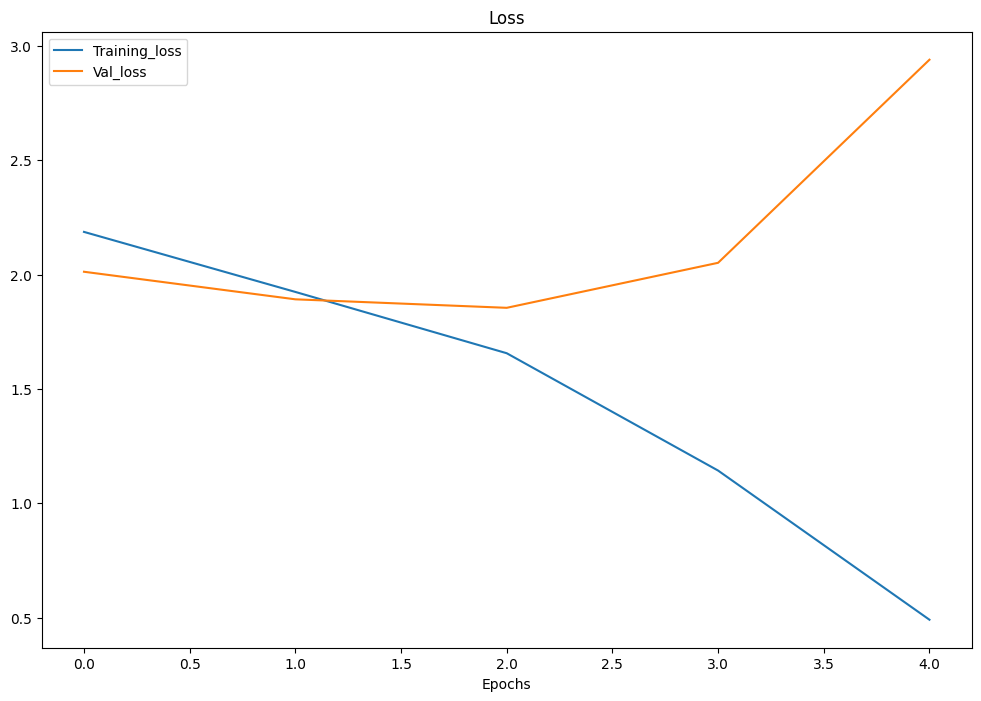

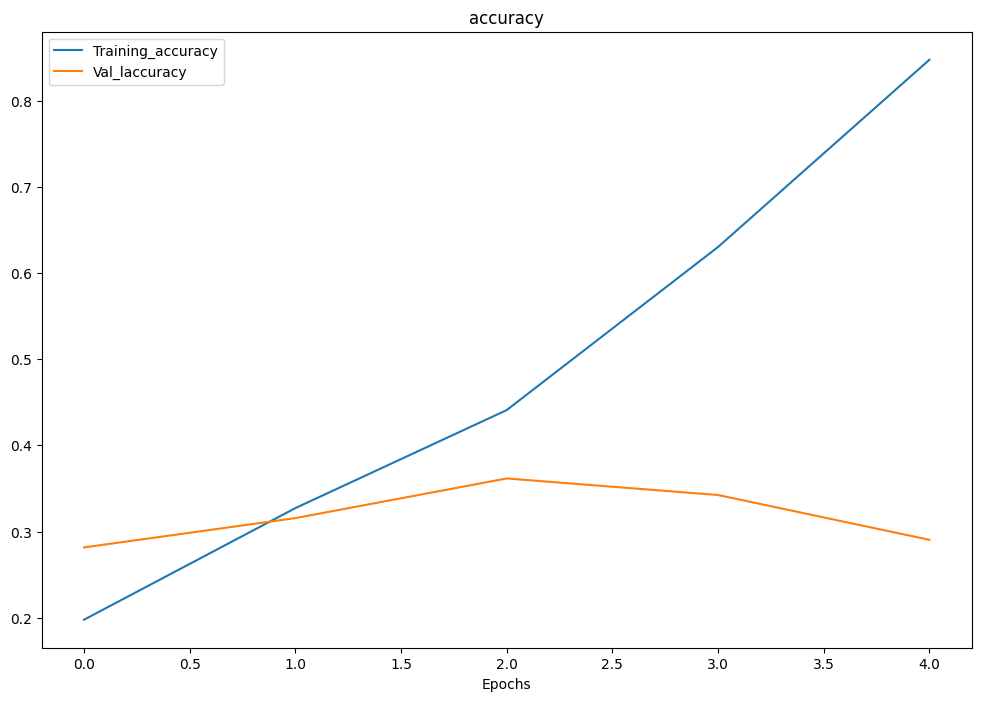

In [12]:
plot_loss_curve(history_1)

**It can be seen that Model is clearly overfitting**

## 6. Adjust the model hyperparameters (to beat our baseline model):

In [13]:
# Inorder to tackle with overfitting lets remove some layers and simplyfy our model:

model_2 = Sequential([
    Conv2D(10,3,activation = 'relu', input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [16]:
model_2.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 60s 247ms/step - loss: 2.1716 - accuracy: 0.2241 - val_loss: 2.0355 - val_accuracy: 0.2664
Epoch 2/5
235/235 [==============================] - 50s 212ms/step - loss: 1.8201 - accuracy: 0.3783 - val_loss: 1.9852 - val_accuracy: 0.2968
Epoch 3/5
235/235 [==============================] - 48s 206ms/step - loss: 1.4050 - accuracy: 0.5363 - val_loss: 2.1269 - val_accuracy: 0.2920
Epoch 4/5
235/235 [==============================] - 48s 205ms/step - loss: 0.8723 - accuracy: 0.7257 - val_loss: 2.4935 - val_accuracy: 0.2732
Epoch 5/5
235/235 [==============================] - 47s 202ms/step - loss: 0.4611 - accuracy: 0.8705 - val_loss: 3.1157 - val_accuracy: 0.2548


HMMM Even though we reduced the number the number of layers still model is overfitting.

If we observe the models summary, even though we have reduced the number of layers in the model the number of parameters have incresed.

## Trying data augmentation to reduce the over fitting:

In [17]:
# creating an augmented data generator:

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True
                                             )

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


In [21]:
# Now lets fit the augmented data.
model_3 = tf.keras.models.clone_model(model_1)

model_3.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy']
                )

In [22]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

model_3 = tf.keras.models.clone_model(model_1)

This clones the archeture of the model that is passed in as an argument, it does not take in the learned parameters from the model, rather it only clones the Archetecture.

In [23]:
# Lets fit the model:

history_3 = model_3.fit(train_data_augmented,
                        epochs= 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 127s 518ms/step - loss: 2.2020 - accuracy: 0.1909 - val_loss: 2.0482 - val_accuracy: 0.2636
Epoch 2/5
235/235 [==============================] - 121s 513ms/step - loss: 2.0839 - accuracy: 0.2528 - val_loss: 1.9877 - val_accuracy: 0.3116
Epoch 3/5
235/235 [==============================] - 123s 524ms/step - loss: 2.0031 - accuracy: 0.3000 - val_loss: 1.8822 - val_accuracy: 0.3448
Epoch 4/5
235/235 [==============================] - 122s 520ms/step - loss: 1.9605 - accuracy: 0.3233 - val_loss: 1.7716 - val_accuracy: 0.3872
Epoch 5/5
235/235 [==============================] - 124s 526ms/step - loss: 1.9327 - accuracy: 0.3249 - val_loss: 1.8159 - val_accuracy: 0.3944


In [24]:
model_3.evaluate(test_data)

79/79 [==============================] - 13s 158ms/step - loss: 1.8159 - accuracy: 0.3944


[1.81591796875, 0.3944000005722046]

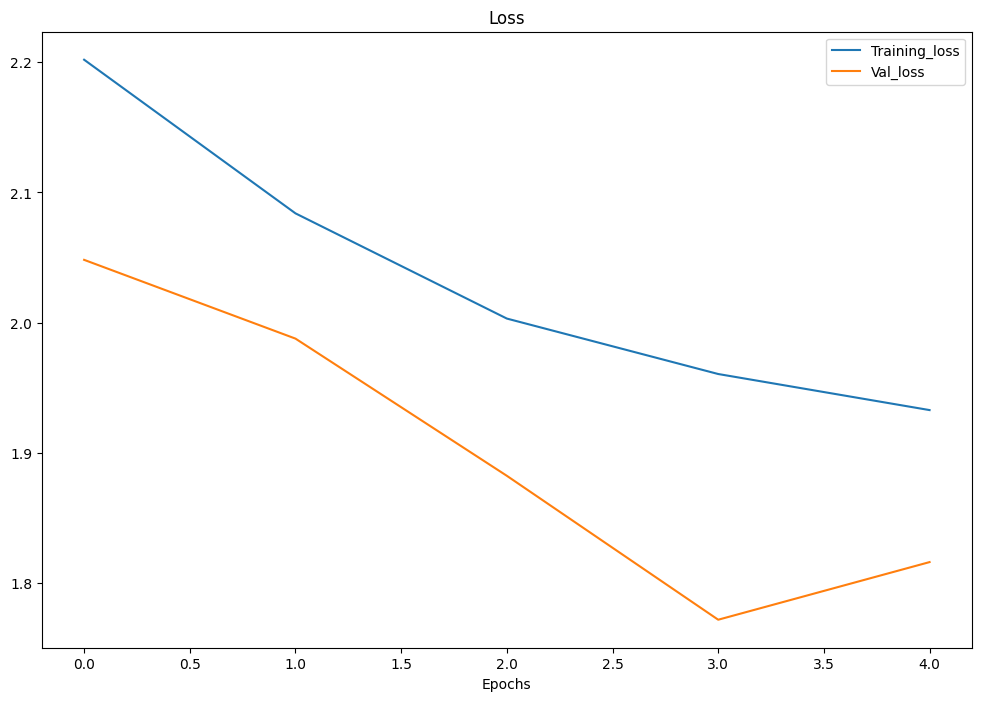

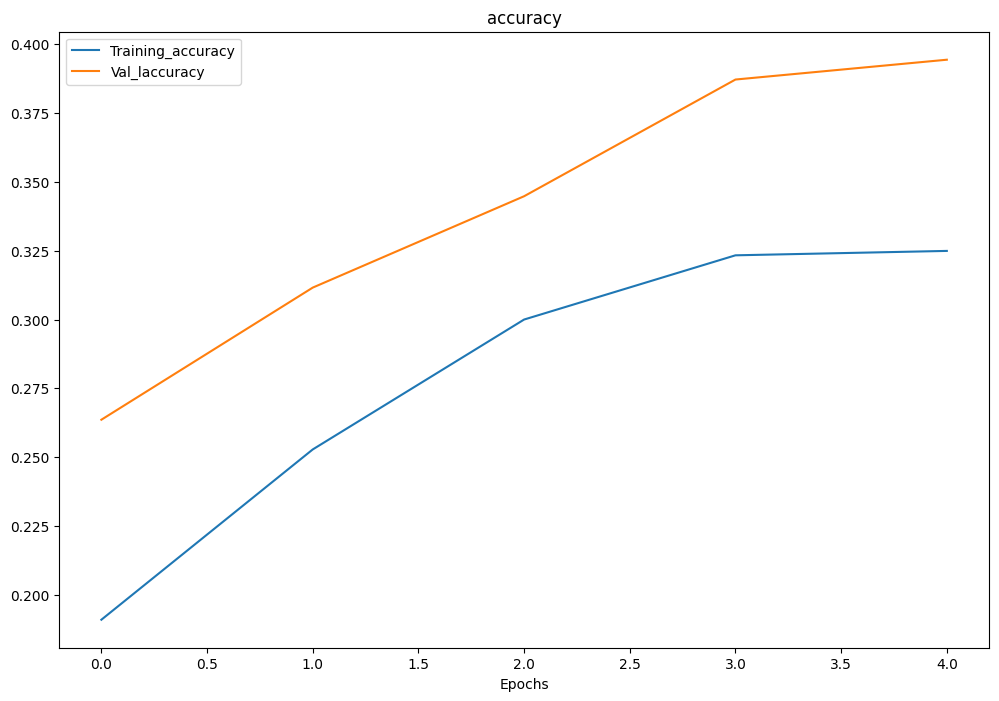

In [25]:
plot_loss_curve(history_3)

These curves look much better than the previous ones, overfitting has been reduced significantly.

## 7. Test until satisfies:

Following things can be done to improve model accurcay further.

* Fit for longer time
* Try different learning rates.
* Augment Data.
* Change the model Archetecture, increse layers filters etc..

## Making predictions with our own custom data:

In [26]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [27]:
# Cretae a function to import image and resize it to be able to be used with our model:

def load_and_prep_image(filename,img_shape = 224):
  """
  Reads in the image from the filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, color_channel).
  """
  # read the image:
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor:
  img = tf.image.decode_image(img)
  # Resize the image :
  img = tf.image.resize(img, size =[img_shape, img_shape])
  # Rescale the image (normalization):
  img = img/255.

  return img

In [35]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports the image located at the filename, make a predictions with the model
  and plots the image with the predicted class as the title
  """

  # Import the image
  img = load_and_prep_image(filename)

  # Make the predictions:
  pred = model.predict(tf.expand_dims(img, axis = 0))

  # Add in logic for multi-class:
  if len(pred[0])>1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  #Plot the image with class name:
  plt.imshow(img)
  plt.title(f'precidiction : {pred_class}')
  plt.axis(False);

1/1 [==============================] - 0s 73ms/step


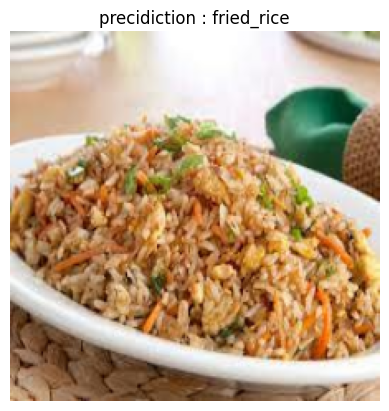

In [38]:
pred_and_plot(model_3, '/content/fried_rice.jpg',class_names = class_names)

1/1 [==============================] - 0s 22ms/step


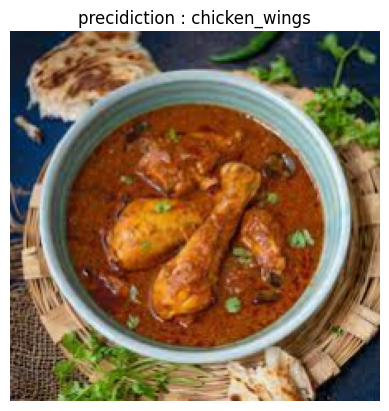

In [39]:
pred_and_plot(model_3, '/content/chicken_curry.jpg',class_names = class_names)

1/1 [==============================] - 0s 34ms/step


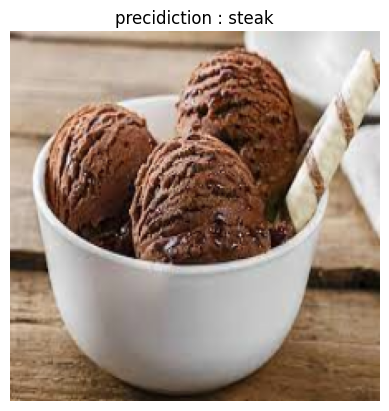

In [40]:
pred_and_plot(model_3, '/content/ice_cream.jpg',class_names = class_names)

**Model is able to pick up some of the images correctly but it is obviously not performing very well.**
